In [8]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
gdas_data = pd.read_csv("data/Stanica IPH/GDAS_2017_2019_IPH.csv")
gdas_data = gdas_data.dropna()
gdas_data['Date']= pd.to_datetime(gdas_data['Date'])
gdas_data.t02m -= 273.15  # convert to Celsius
gdas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8624 entries, 0 to 26253
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8624 non-null   datetime64[ns]
 1   prss    8624 non-null   float64       
 2   mslp    8624 non-null   float64       
 3   tpp6    8624 non-null   float64       
 4   umof    8624 non-null   float64       
 5   vmof    8624 non-null   float64       
 6   shif    8624 non-null   float64       
 7   dswf    8624 non-null   float64       
 8   rh2m    8624 non-null   float64       
 9   wd10m   8624 non-null   float64       
 10  ws10m   8624 non-null   float64       
 11  t02m    8624 non-null   float64       
 12  tcld    8624 non-null   float64       
 13  shgt    8624 non-null   float64       
 14  cape    8624 non-null   float64       
 15  cinh    8624 non-null   float64       
 16  lisd    8624 non-null   float64       
 17  lib4    8624 non-null   float64       
 18  pblh   

```
Field                                                  Units    Label    Data Order
Pressure at surface                                    hPa       PRSS    S1
Pressure reduced to mean sea level                     hPa       MSLP    S2
Accumulated precipitation (6 h accumulation)           m         TPP6    S3
u-component of momentum flux (3- or 6-h average)       N/m2      UMOF    S4
v-component of momentum flux (3- or 6-h average)       N/m2      VMOF    S5
Sensible heat net flux at surface (3- or 6-h average)  W/m2      SHTF    S6
Downward short wave radiation flux (3- or 6-h average) W/m2      DSWF    S7
Relative Humidity at 2m AGL                            %         RH2M    S8
U-component of wind at 10 m AGL                        m/s       U10M    S9
V-component of wind at 10 m AGL                        m/s       V10M    S10
Temperature at 2m AGL                                  K         TO2M    S11
Total cloud cover (3- or 6-h average)                  %         TCLD    S12
Geopotential height                                    gpm*      SHGT    S13
Convective available potential energy                  J/Kg      CAPE    S14
Convective inhibition                                  J/kg      CINH    S15
Standard lifted index                                  K         LISD    S16
Best 4-layer lifted index                              K         LIB4    S17
Planetary boundary layer height                        m         PBLH    S18
Temperature at surface                                 K         TMPS    S19
Accumulated convective precipitation (6 h accumulation) m        CPP6**  S20
Volumetric soil moisture content                        frac.    SOLM    S21
Categorial snow (yes=1, no=0) (3- or 6-h average)                CSNO    S22
Categorial ice (yes=1, no=0) (3- or 6-h average)                 CICE    S23
Categorial freezing rain (yes=1, no=0) (3- or 6-h average)       CFZR    S24
Categorial rain (yes=1, no=0) (3- or 6-h average)                CRAI    S25
Latent heat net flux at surface (3- or 6-h average)    W/m2      LHTF    S26
Low cloud cover (3- or 6-h average)                    %         LCLD    S27
Middle cloud cover (3- or 6-h average)                 %         MCLD    S28
High cloud cover (3- or 6-h average)                   %         HCLD    S29
Geopotential height                                    gpm*      HGTS    U1
Temperature                                            K         TEMP    U2
U-component of wind with respect to grid               m/s       UWND    U3
V-component of wind with respect to grid               m/s       VWND    U4
Pressure vertical velocity                             hPa/s     WWND    U5
Relative humidity                                      %         RELH    U6
```

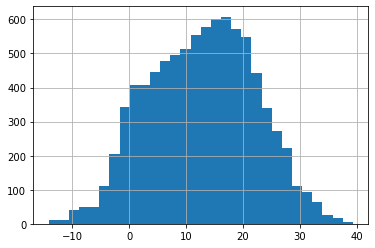

In [10]:
hist = gdas_data.t02m.hist(bins=30)

In [11]:
a = gdas_data.iloc[0][1]
a

1007.8

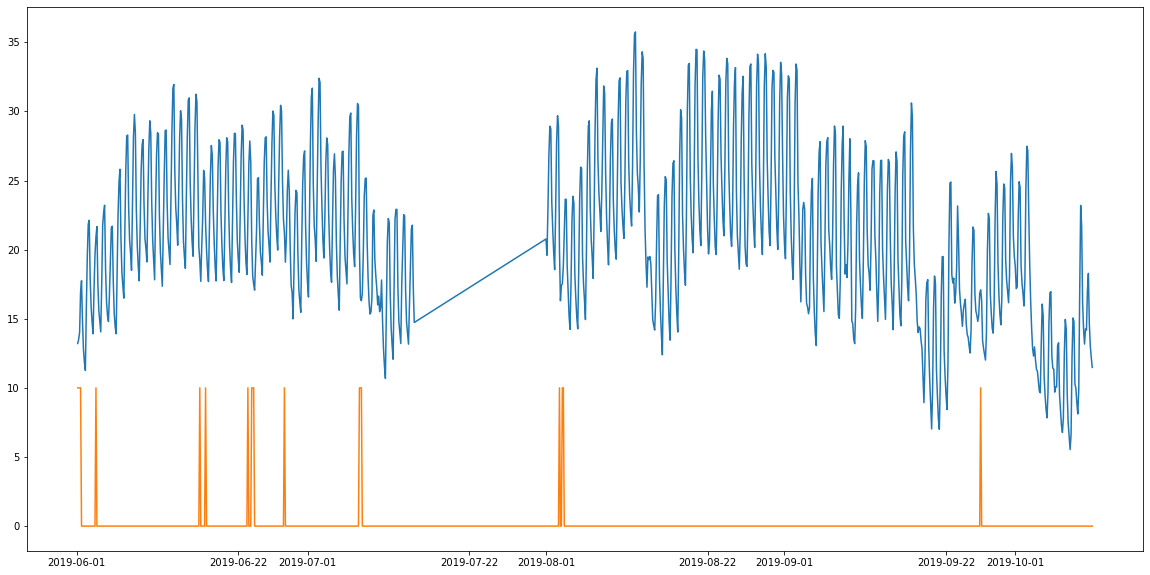

In [12]:
start_date = datetime.datetime(2019,6,1)
end_date  = datetime.datetime(2019,10,11)
mask = (gdas_data['Date'] > start_date) & (gdas_data['Date'] <= end_date)

deo = gdas_data.loc[mask]

plt.figure(figsize=(20,10))
plt.plot(deo.Date, deo.t02m)
plt.plot(deo.Date, 1000*deo.tpp6)

plt.show()

In [13]:
#Uzimanje srednje temperature i std po danu
lista = []
count = 0
dan = None
srednja_temp = 0.0
std_list = []

for index, row in deo.iterrows():
  if dan == None or dan != row[0].day:
    if len(std_list) > 0:
      datum = datetime.datetime(row[0].year, row[0].month, row[0].day)

      mean = sum(std_list) / len(std_list) 
      variance = sum([((x - mean) ** 2) for x in std_list]) / len(std_list) 
      res = variance ** 0.5
                                
      lista.append({"date": datum, 
                    "srednja_temp": srednja_temp/count, 
                    "std": res})

    dan = row[0].day
    srednja_temp = 0.0
    count = 0
    std_list = []

  srednja_temp += row[11]
  std_list.append(row[11])
  count +=1

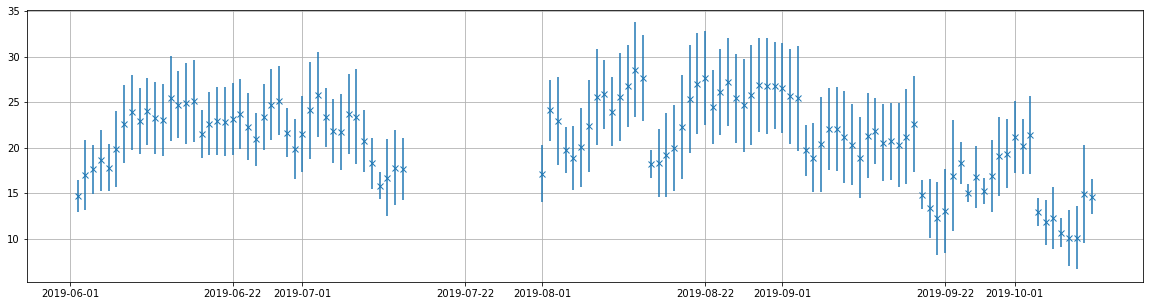

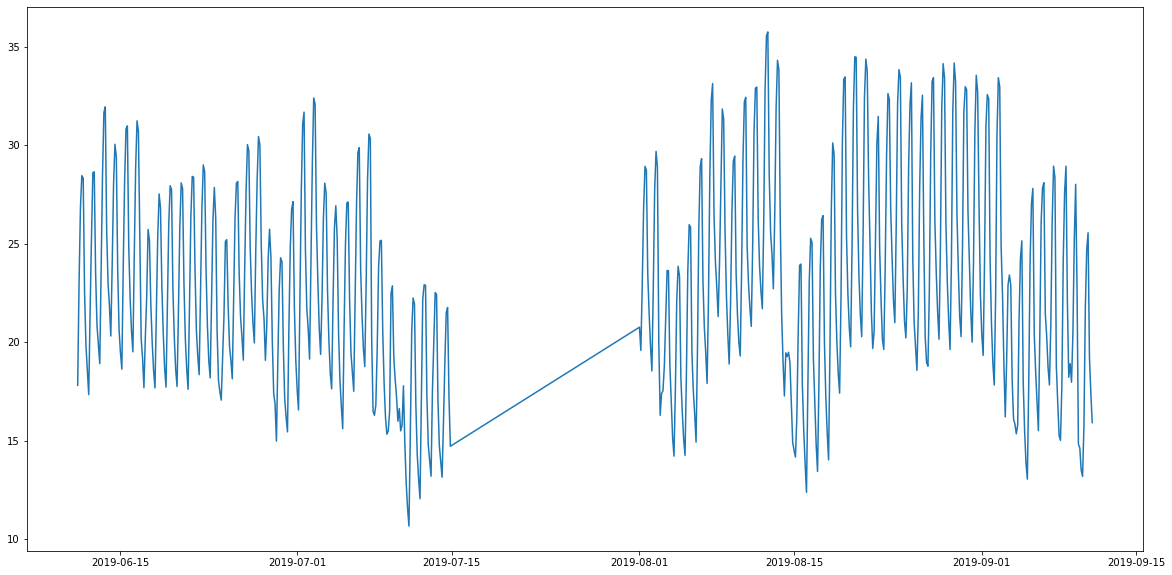

In [14]:
df = pd.DataFrame(lista)
plt.figure(figsize=(20, 5))
plt.errorbar(df.date, df.srednja_temp, df["std"], linestyle='None', marker='x')
plt.grid()
# plt.scatter(df.date, df.srednja_temp)
plt.show()
start_date = datetime.datetime(2019,6,11)
end_date  = datetime.datetime(2019,9,11)
mask = (gdas_data['Date'] > start_date) & (gdas_data['Date'] <= end_date)

deo = gdas_data.loc[mask]

plt.figure(figsize=(20,10))
plt.plot(deo.Date, deo.t02m)

plt.show()

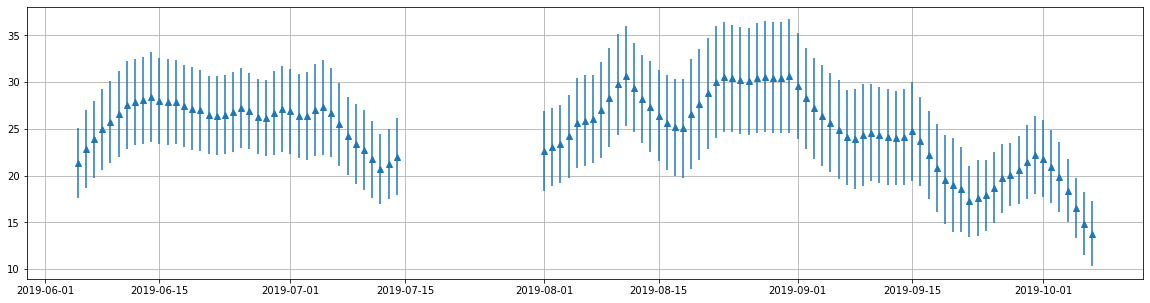

In [13]:
#Racunanje srednje temperature i std po principu -3 +3
new_list = []
lista_za_proveru = []
srednja_temp = 0
std = 0

for i in range(0, len(lista)):
    if i < 7:
        lista_za_proveru.append(lista[i])
    else:
        for t in range(len(lista_za_proveru)):
            if i != 3:
                srednja_temp+=lista_za_proveru[t]["srednja_temp"]
                std+=lista_za_proveru[t]["std"]
            
        srednja_temp = srednja_temp/(len(lista_za_proveru)-1)
        std = std/(len(lista_za_proveru)-1)

        new_list.append({"date":lista_za_proveru[3]["date"], "srednja_temp":srednja_temp, "std":std})
        lista_za_proveru.pop(0)
        lista_za_proveru.append(lista[i])
        srednja_temp = 0
        std = 0

df = pd.DataFrame(new_list)
df


plt.figure(figsize=(20, 5))
plt.grid()
plt.errorbar(df.date, df.srednja_temp, df["std"], linestyle='None', marker='^')
plt.show()


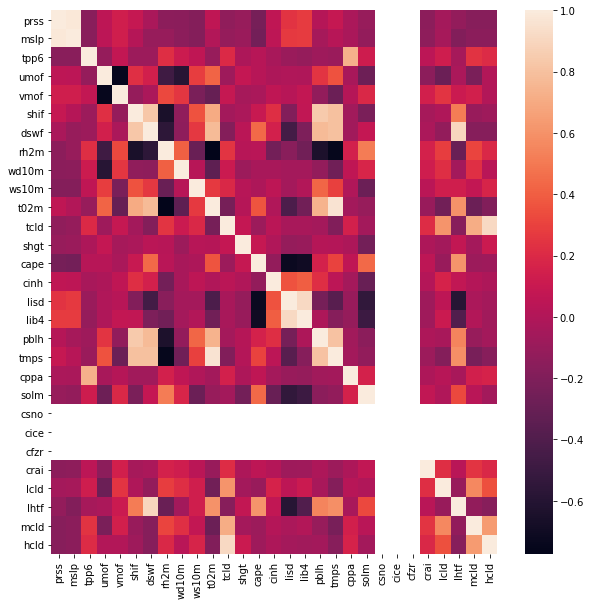

In [9]:
import seaborn as sn
plt.figure(figsize=(10, 10))

df = pd.DataFrame(deo)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=False)

plt.show()

In [10]:
deo = deo.resample('D', on="Date").mean()
deo.srednja_temp = deo.t02m.interpolate(method="cubic")

<ipython-input-10-4b804dce6176>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  deo.srednja_temp = deo.t02m.interpolate(method="cubic")


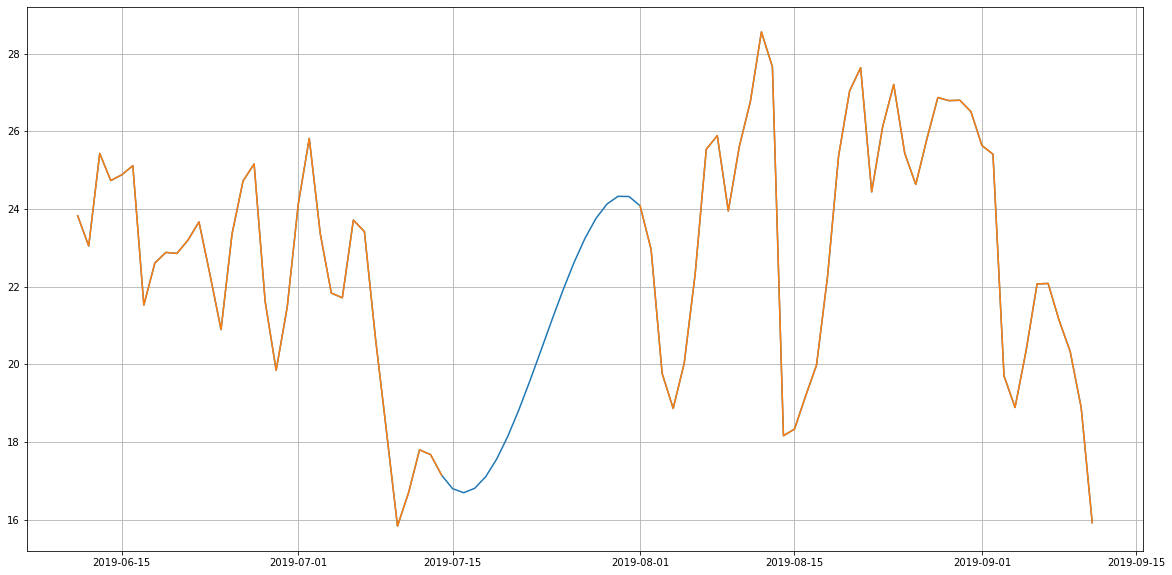

In [11]:
plt.figure(figsize=(20,10))
plt.plot(deo.index, deo.srednja_temp)
plt.plot(deo.index, deo.t02m)
plt.grid()
plt.show()